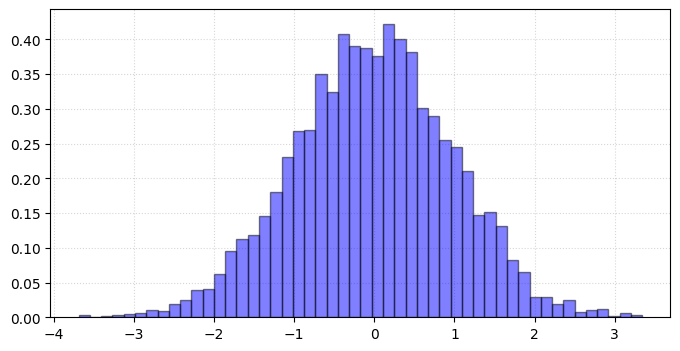

Точечная оценка математического ожидания:  -0.021601945155603104
Точечная оценка дисперсии:  0.9749531913512401
При 0.9 интервальная оценка матожидания: (-0.044574781870029584, 0.001370891558823379)
При 0.9 интервальная оценка дисперсии: (-1.6460268075418285, 1.6028229172306223)


In [40]:
import numpy as np
import random
from pynverse import inversefunc
import matplotlib.pyplot as plt
from scipy.stats import norm, t, sem


# TASK 1
amount_of_numbers: int = 5000
a: float = 1.00
b: float = 5.00
u: list[float] = [random.random() for _ in range(amount_of_numbers)]

distribution_function = norm.cdf
inverse_function = inversefunc(distribution_function)

values = np.array([inverse_function(val) for val in u])
N: int = len(values)

# Histogram
plt.figure(figsize=(8, 4))
plt.hist(values, bins=50, color='blue', density=True, edgecolor='k', label='Distribution', alpha=0.5, zorder=2)
plt.grid(which='both', linestyle='dotted', alpha=0.5)
plt.show()


# Marks

# точечная оценка
# http://datalearning.ru/index.php/textbook?cid=1&mid=1&topic=2
mu: float = values.mean()
dx: float = ((values - mu) ** 2).sum() / (N - 1)
print('Точечная оценка математического ожидания: ', mu)
print('Точечная оценка дисперсии: ', dx)


# интервальные оценки (доверительный интервал)

confidence_level = 0.9 # Задаем уровень доверия
sample_standard_error: float = sem(values) # # Вычисляем стандартную ошибку выборки
t_value = t.ppf((1 + confidence_level) / 2, N - 1) # Вычисляем t-значение для заданного уровня доверия и степеней свободы
confidence_interval = (mu - t_value * sample_standard_error, mu + t_value * sample_standard_error) # Вычисляем интервальную оценку матожидания
print(f'При {confidence_level} интервальная оценка матожидания: {confidence_interval}')

standard_derivation = np.std(values, ddof=1)
h = standard_derivation * t.ppf((1 + confidence_level) / 2, N - 1)
print(f'При {confidence_level} интервальная оценка дисперсии: {(mu - h, mu + h)}')